In [1]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [1]:
import mysql.connector
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Connecting to mysql
connection = mysql.connector.connect(host='127.0.0.1',
                                         database='kyte',
                                         user='root',
                                         password='Srinu1999*')

In [3]:
# Creating dataframes for each table in the database
company = pd.read_sql_query("SELECT * FROM company",connection)
employees = pd.read_sql_query("SELECT * FROM employees",connection)
admin = pd.read_sql_query("SELECT * FROM admin",connection)
driver = pd.read_sql_query("SELECT * FROM driver",connection)
custcare = pd.read_sql_query("SELECT * FROM custcare",connection)
customer = pd.read_sql_query("SELECT * FROM customer",connection)
branch = pd.read_sql_query("SELECT * FROM branch",connection)
car = pd.read_sql_query("SELECT * FROM car",connection)
booking = pd.read_sql_query("SELECT * FROM booking",connection)

### Data Visualizations

C:\Users\srioc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


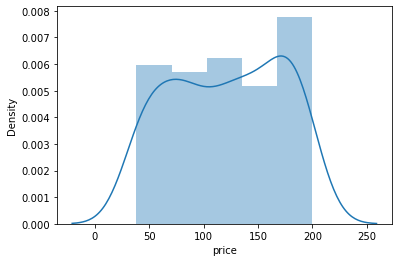

In [9]:
# Plotting the distribution of the price of each rental
ax = sns.distplot(booking['price'])

Text(0.5, 1.0, 'Overall bookings in each branch')

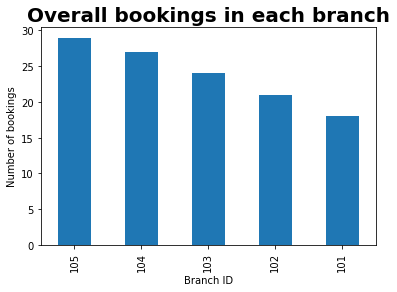

In [10]:
# Bar chart of overall booking in each branch
booking["brID"].value_counts().plot(kind='bar')
plt.xticks(rotation=90)
plt.xlabel("Branch ID")
plt.ylabel("Number of bookings")
plt.title("Overall bookings in each branch", fontsize = 20, fontweight= 'bold')

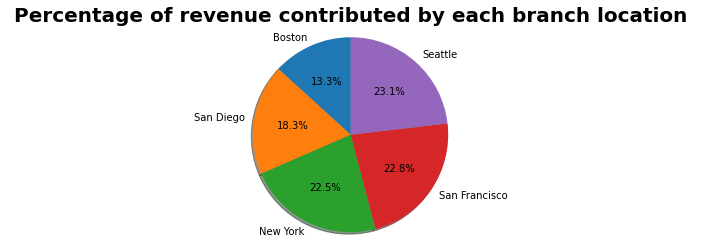

In [11]:
# Percentage of revenue contributed by each location
br_price = booking[['brID','price']]
br_price = br_price.groupby(['brID']).sum()['price'].reset_index()
br_price['city'] = branch['city'].copy()
fig1, ax1 = plt.subplots()
ax1.pie(br_price['price'], labels=br_price['city'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.title(" Percentage of revenue contributed by each branch location ", fontsize = 20, fontweight= 'bold')
plt.show()

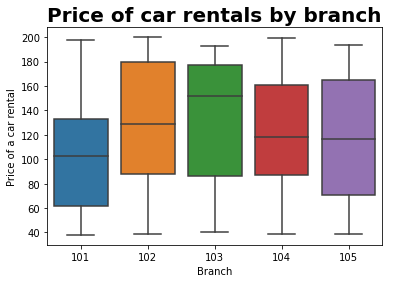

In [7]:
# Boxplot of price of car rentals over all branches
sns.boxplot(x=booking['brID'], y=booking['price'])
plt.xlabel("Branch")
plt.ylabel("Price of a car rental")
plt.title(" Price of car rentals by branch ", fontsize = 20, fontweight= 'bold')
plt.show()

Text(0.5, 1.0, 'Most rented cars across all branches')

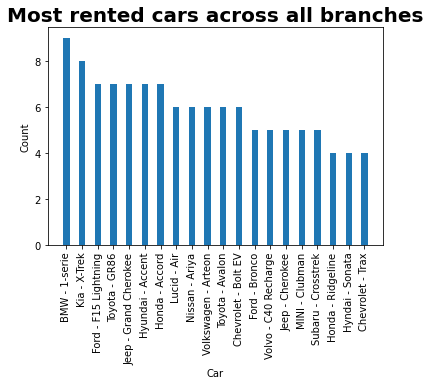

In [8]:
# Bar chart
car_count = booking['carID'].value_counts().reset_index()
car_count['brand'] = car['brand'] +  ' - ' + car['model']
car_count
plt.xticks(rotation=90)
plt.bar(car_count['brand'], car_count['carID'],
        width = 0.4)
plt.xticks(rotation=90)
plt.xlabel("Car")
plt.ylabel("Count")
plt.title("Most rented cars across all branches", fontsize = 20, fontweight= 'bold')
